<a href="https://colab.research.google.com/github/d58195/d58195/blob/main/comphy_1117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

In [4]:
a = torch.tensor([1])
a

tensor([1])

In [6]:
b = torch.tensor([[1,2],[3,4]])
b

tensor([[1, 2],
        [3, 4]])

In [9]:
c = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
c

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [11]:
a = torch.tensor([1])
b = torch.tensor([2])
a+b, a-b, a*b, a/b

(tensor([3]), tensor([-1]), tensor([2]), tensor([0.5000]))

In [12]:
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])
a+b, a-b, a*b, a/b

(tensor([[ 6,  8],
         [10, 12]]), tensor([[-4, -4],
         [-4, -4]]), tensor([[ 5, 12],
         [21, 32]]), tensor([[0.2000, 0.3333],
         [0.4286, 0.5000]]))

In [13]:
a = np.array([[1,2],[3,4]])
b = np.array([[4,5],[6,7]])
np.dot(a,b)

array([[16, 19],
       [36, 43]])

In [20]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]]).float()
y = torch.tensor([[0],[1],[1],[0]]).float()

In [21]:
din, dh, dout = 2,4,1

model = torch.nn.Sequential(
    
    torch.nn.Linear(din,dh),

    torch.nn.Sigmoid(),

    torch.nn.Linear(dh,dout),

    torch.nn.Sigmoid()
)

In [24]:
model(X)

tensor([[0.4270],
        [0.4069],
        [0.4366],
        [0.4156]], grad_fn=<SigmoidBackward0>)

In [25]:
learning_rate = 1e-3
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [34]:
for epoch in range(10000):
    y_pred = model(X)
    loss = criterion(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [35]:
model(X)

tensor([[0.0091],
        [0.9875],
        [0.9908],
        [0.0084]], grad_fn=<SigmoidBackward0>)

In [37]:
from sklearn import datasets

iris = datasets.load_iris()

In [76]:
X = torch.tensor(iris.data).float()
y = torch.tensor(iris.target).long()

In [77]:
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [189]:
din, dh, dout = 4,14,3
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh), 
    torch.nn.ReLU(),         
    torch.nn.Linear(dh,dout), 
    torch.nn.Softmax(dim=1)
)

In [190]:
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred,y)
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step() 
    if(epoch%1000==0):
        print(epoch, loss.item())

0 1.1184477806091309


In [191]:
prediction = y_pred.max(1)[1]
prediction

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [192]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [193]:
corrects = (prediction == y)
accuracy = corrects.sum().float() / float(y.size(0))
accuracy

tensor(0.)

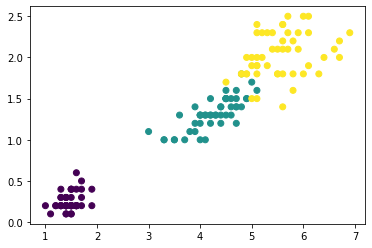

In [194]:
import matplotlib.pyplot as plt

plt.scatter(X[:,2],X[:,3],c=y)

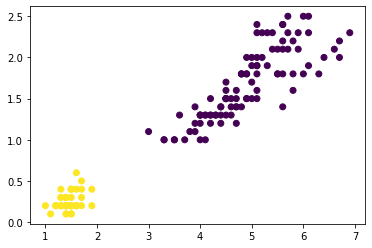

In [195]:
plt.scatter(X[:,2],X[:,3],c=prediction)